# Center of Mass / Centroid distance

Where "in" groeps are 10 AA that are toward the cytplasm side of the protein and "out" groups are 10 amino acids towards the periplasm.

```text
Available static index groups:
Group 0  [TM1_in]
Group 1  [TM1_out]
Group 2  [TM2_in]
Group 3  [TM2_out]
Group 4  [TM5_in]
Group 5  [TM5_out]
Group 6  [TM7_in]
Group 7  [TM7_out]
Group 8  [TM8_in]
Group 9  [TM8_out]
Group 10 [TM11_in]
Group 11 [TM11_out]
```

## 4ZW9 & 5EQI distances

In [ ]:
%%bash 
bash distance_calculation_both.sh

## 4ZW9 COM distances

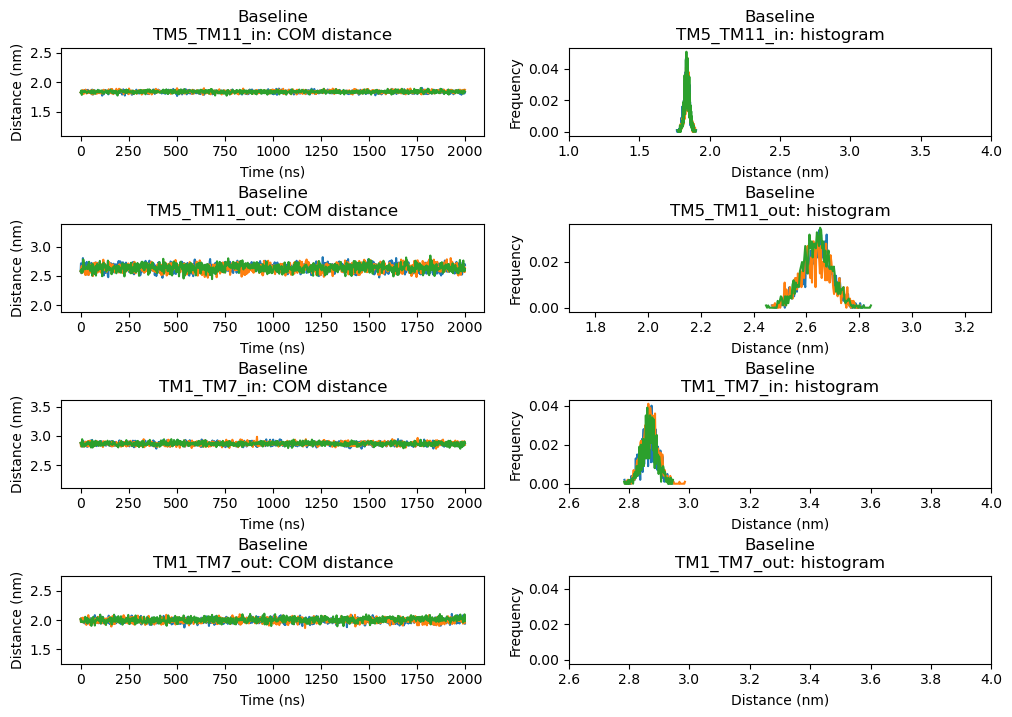

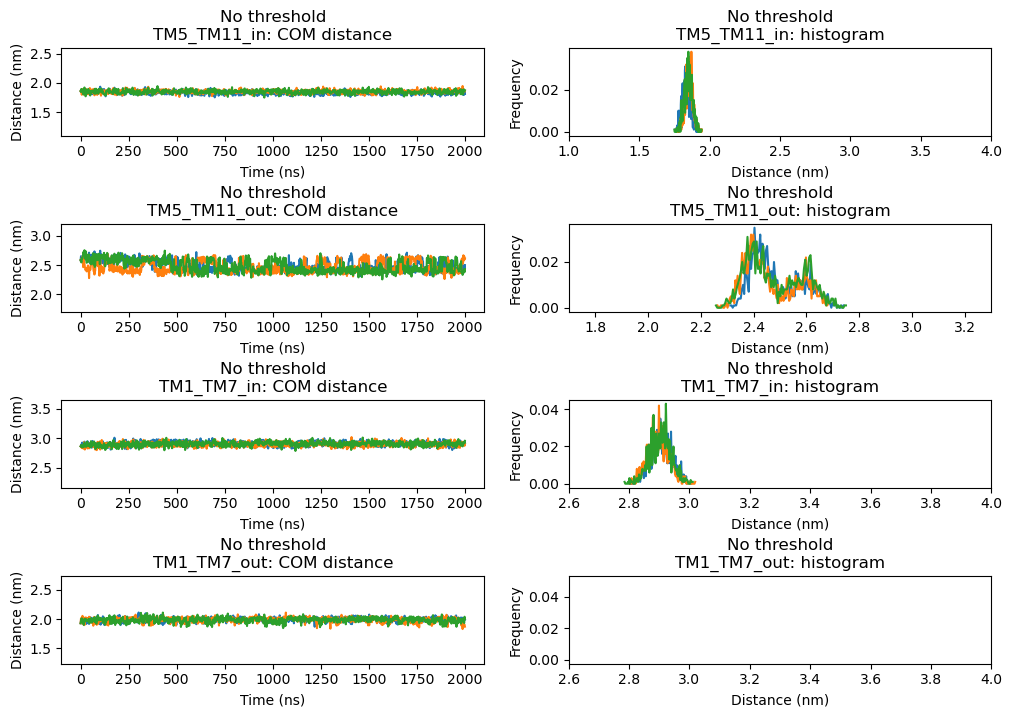

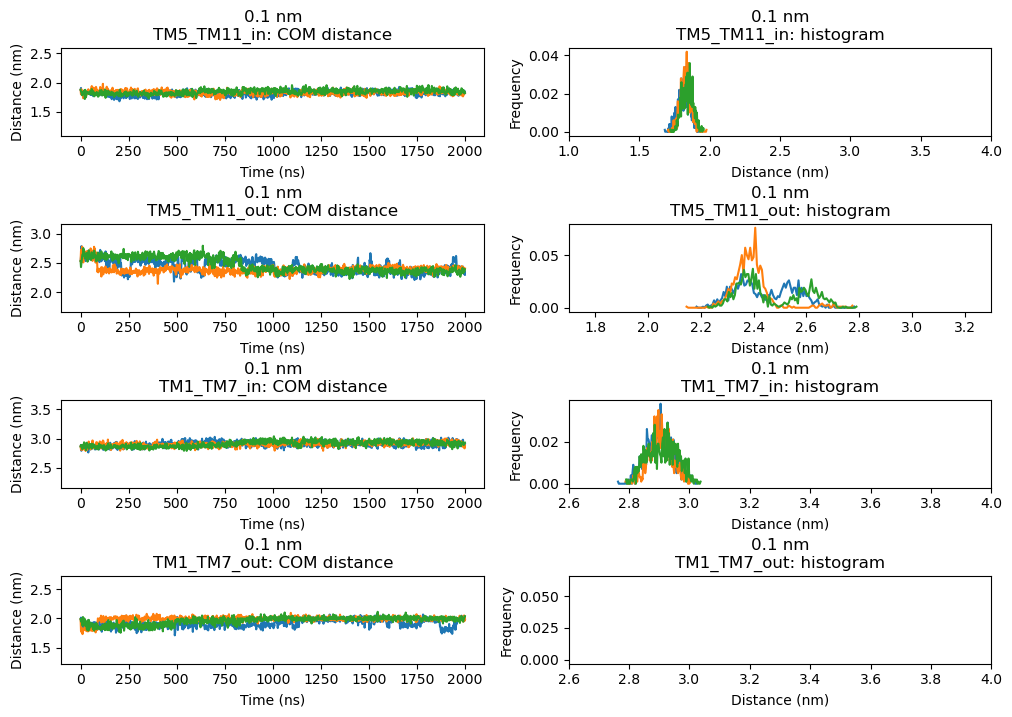

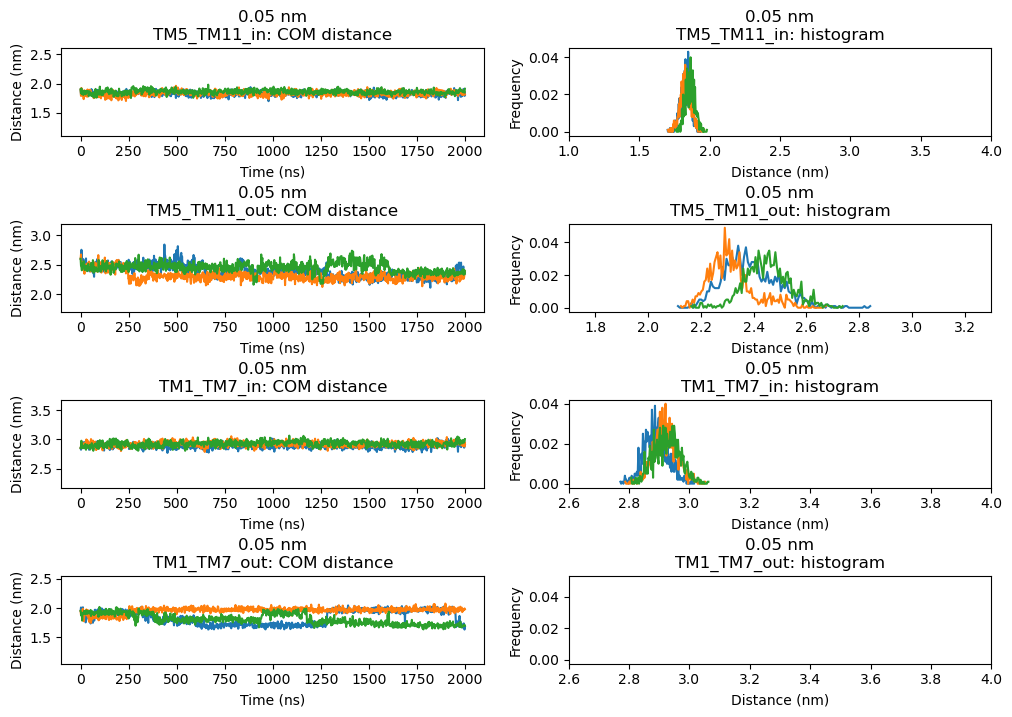

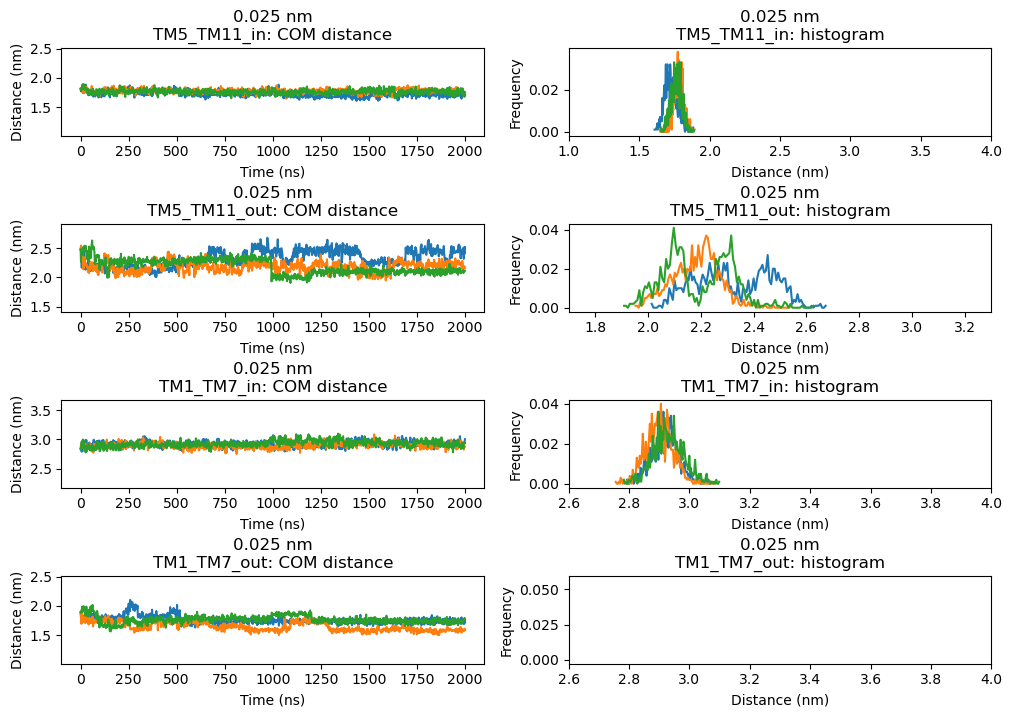

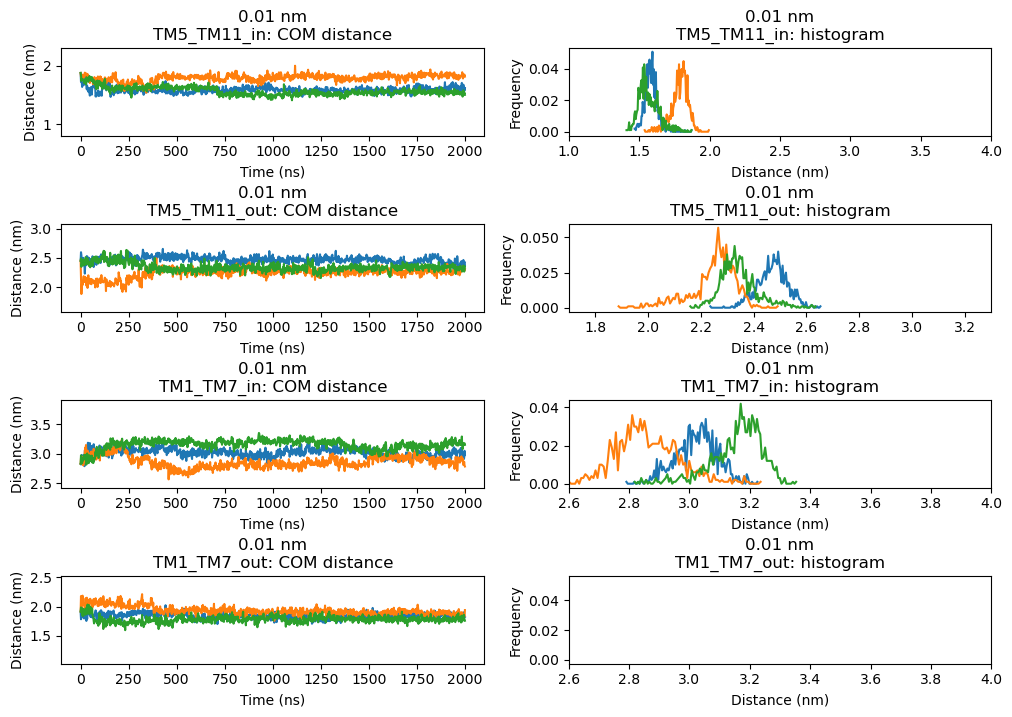

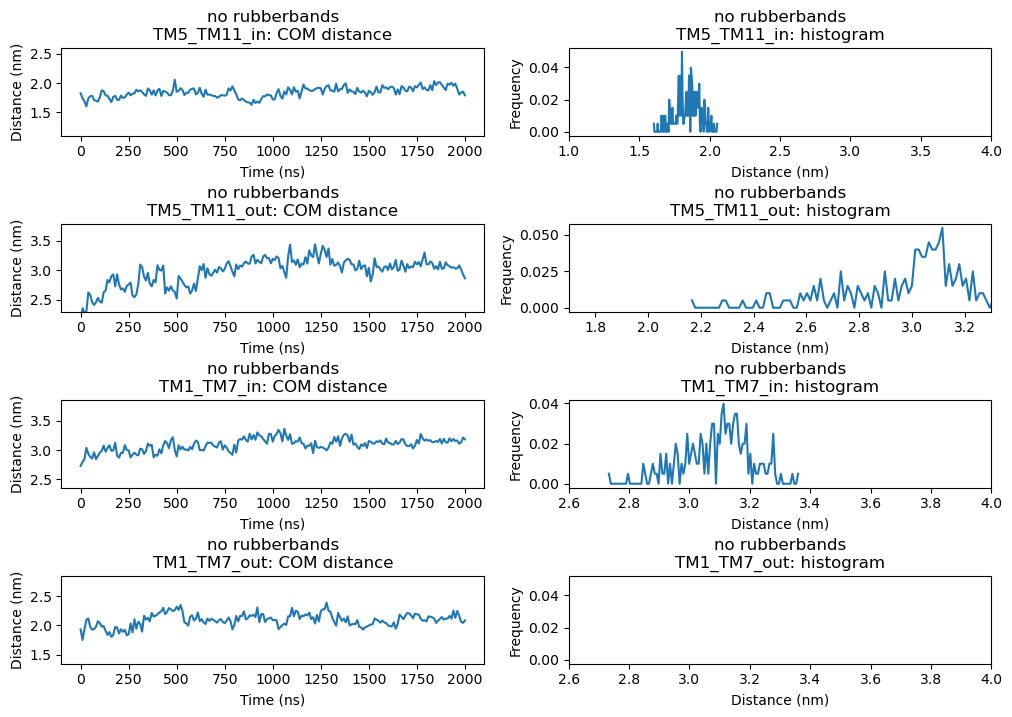

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

ylim_offset = 0.75

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plt.rcParams["figure.figsize"] = (12,8)

dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm no_rubber".split(" ")
label_names = ["Baseline", "No threshold", "0.1 nm", "0.05 nm", "0.025 nm" , "0.01 nm", "no rubberbands"]
names = dict(zip(dir_names, label_names))
    
for threshold in dir_names:
    fig, axs = plt.subplots(4, 2)
    fig.subplots_adjust(hspace=1)
    for j, item in enumerate(["TM5_TM11_in", "TM5_TM11_out", "TM1_TM7_in", "TM1_TM7_out"]):
        for i in range(3):
            path = "distances/4zw9/" + f"{threshold}_{item}_rep{i+1}.com.xvg"
            if not os.path.isfile(path):
                continue

            res = np.loadtxt(path, comments=["@", "#"],unpack=True)
            x = pd.Series(res[0,:])/1000
            y = pd.DataFrame(res[1:2,]).T.apply(lambda d: np.min(d), axis=1)

            filt = x <= 2000
            x = x[filt]
            y = y[filt] 

            x = subset(x)
            y = subset(y)

            y_hist,binEdges=np.histogram(y,bins=100)
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

            label = names[threshold]
            axs[j][1].plot(bincenters, y_hist/sum(y_hist))
            axs[j][1].set_title(f"{label}\n{item}: histogram")
            axs[j][1].set_xlabel("Distance (nm)")
            axs[j][1].set_ylabel("Frequency")

            axs[j][0].plot(x, y)
            axs[j][0].set_title(f"{label}\n{item}: COM distance")
            axs[j][0].set_xlabel("Time (ns)")
            axs[j][0].set_ylabel("Distance (nm)")
            axs[j][0].set_ylim((np.median(y)-ylim_offset, np.median(y)+ylim_offset))

            # Draw a line for the start:
            # axs[j][1].axvline(x=y[0], c="grey")

            if j == 0:
                axs[j][1].set_xlim((1, 4))
            if j == 1:
                axs[j][1].set_xlim((1.7, 3.3))
            if j == 2:
                axs[j][1].set_xlim((2.6, 4))
            if j == 3:
                axs[j][1].set_xlim((2.6, 4))
            


## 5EQI COM distances

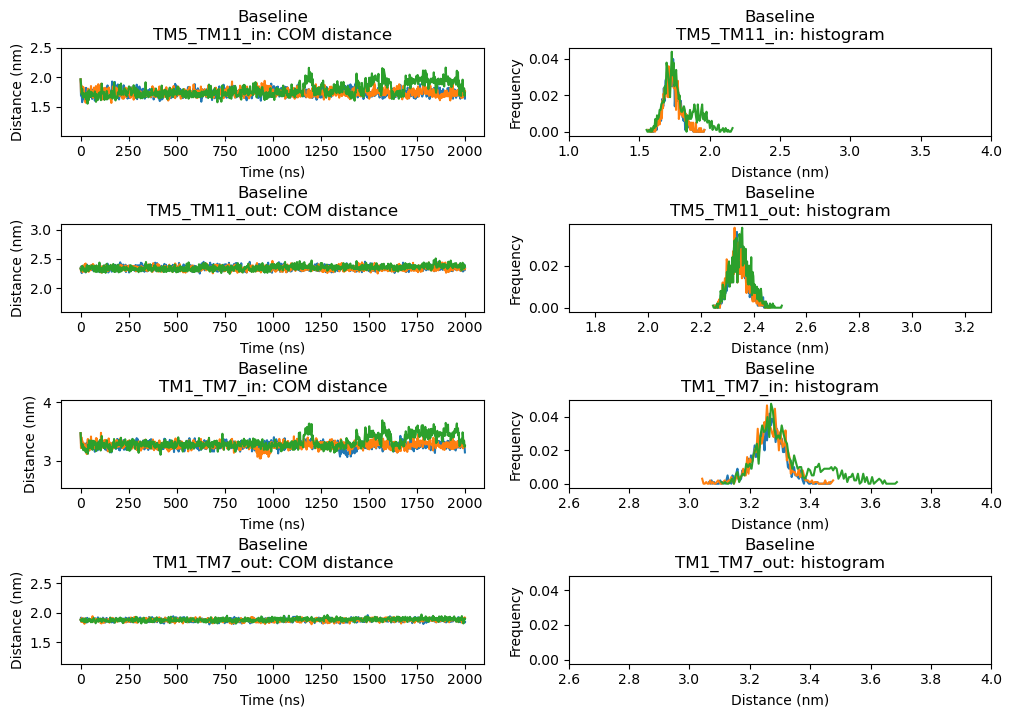

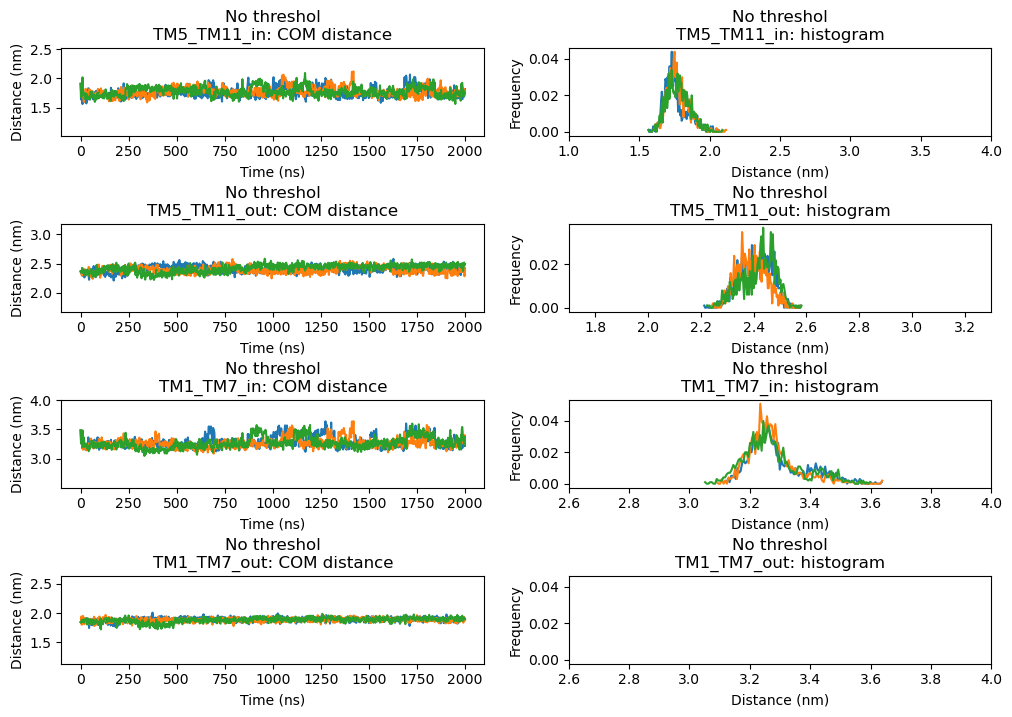

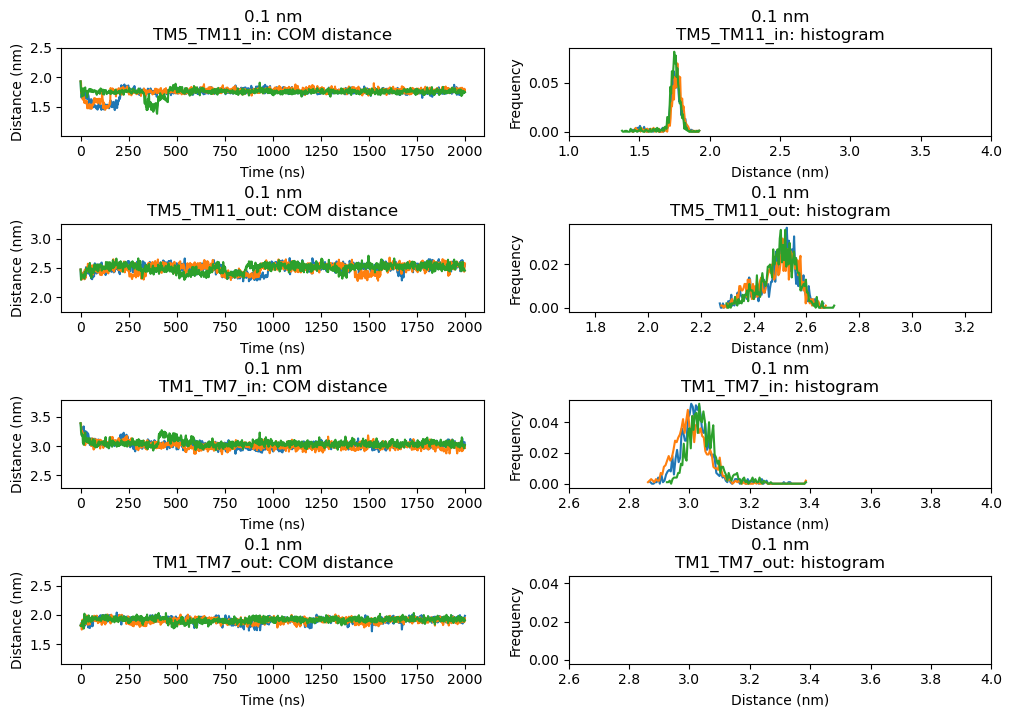

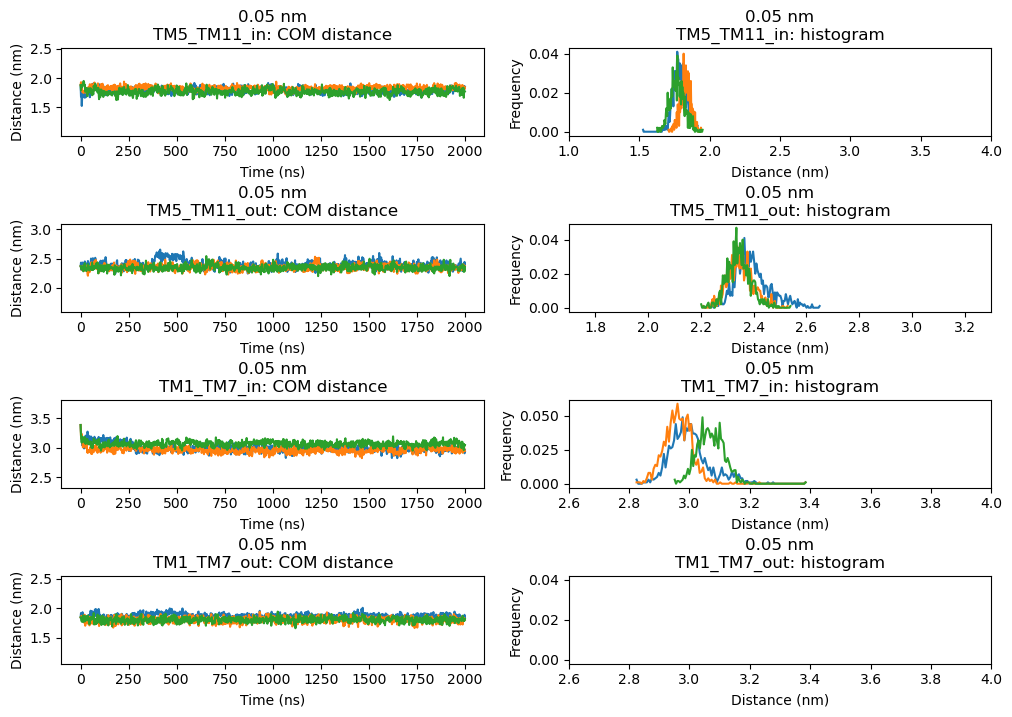

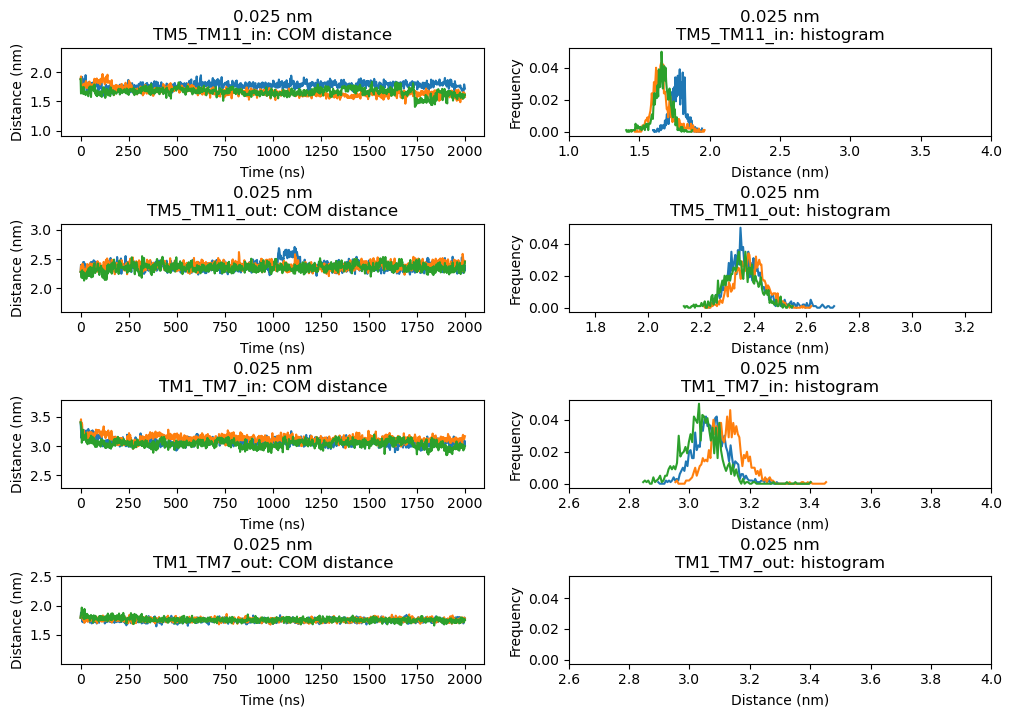

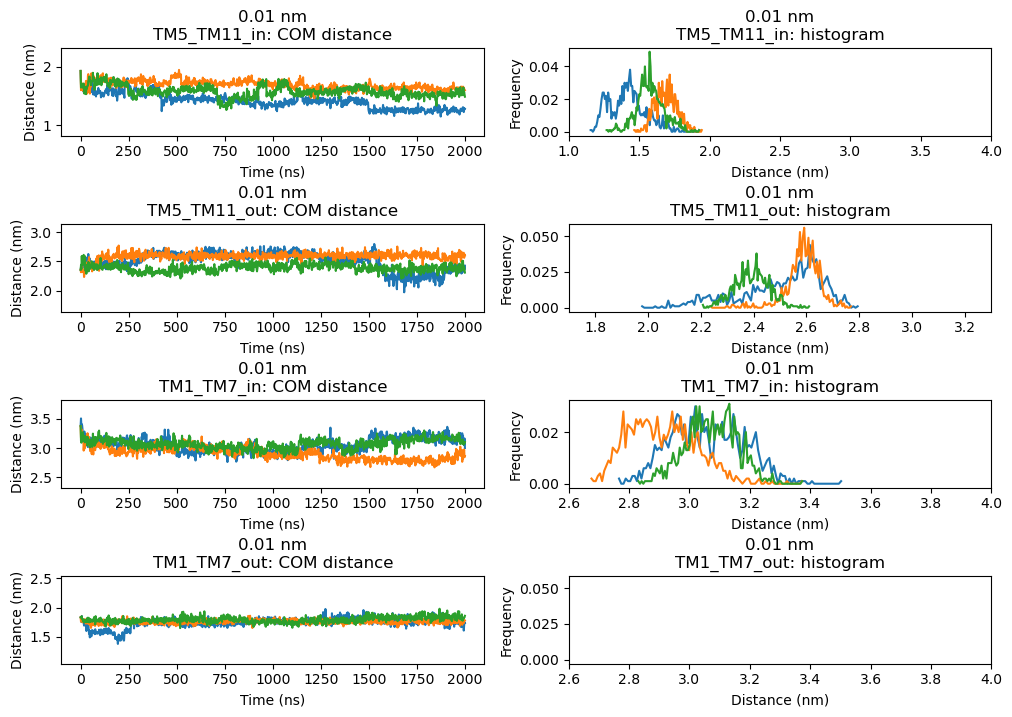

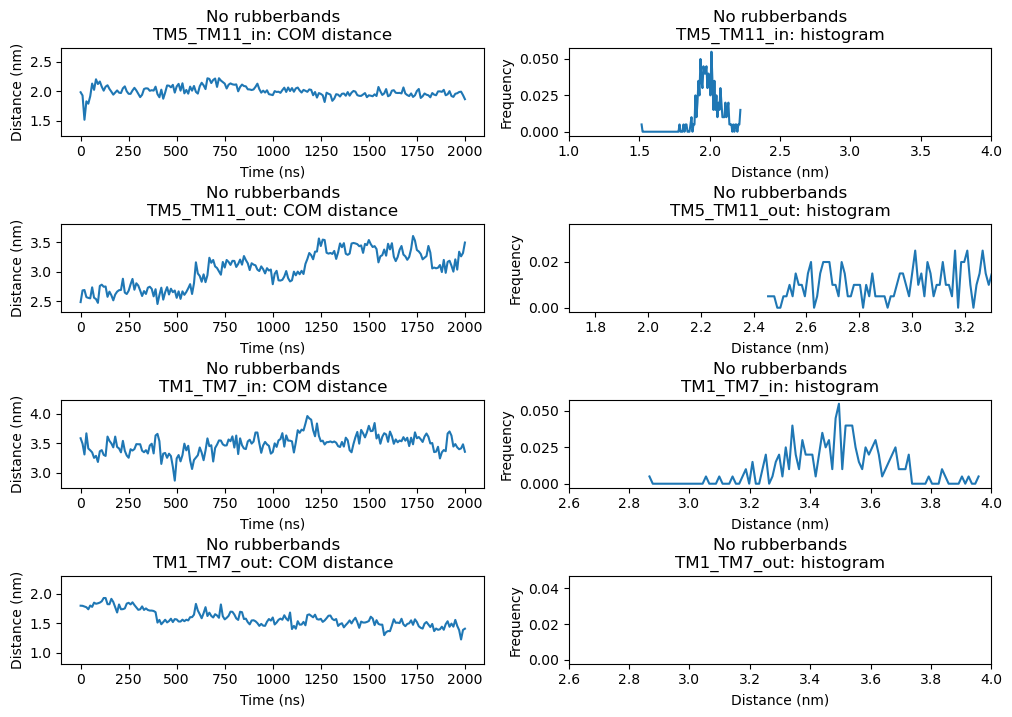

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ylim_offset = 0.75
threshold = "1.0_angstrom"

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plt.rcParams["figure.figsize"] = (12,8)

dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm no_rubber".split(" ")
label_names = ["Baseline", "No threshol", "0.1 nm", "0.05 nm", "0.025 nm" , "0.01 nm", "No rubberbands"]
names = dict(zip(dir_names, label_names))
    
for threshold in dir_names:
    fig, axs = plt.subplots(4, 2)
    fig.subplots_adjust(hspace=1)
    for j, item in enumerate(["TM5_TM11_in", "TM5_TM11_out", "TM1_TM7_in", "TM1_TM7_out"]):
        for i in range(3):
            path = "distances/5eqi/" + f"{threshold}_{item}_rep{i+1}.com.xvg"
            if not os.path.isfile(path):
                continue

            res = np.loadtxt(path, comments=["@", "#"],unpack=True)
            x = pd.Series(res[0,:])/1000
            y = pd.DataFrame(res[1:2,]).T.apply(lambda d: np.min(d), axis=1)

            filt = x <= 2000
            x = x[filt]
            y = y[filt] 

            x = subset(x)
            y = subset(y)

            y_hist,binEdges=np.histogram(y,bins=100)
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

            label = names[threshold]
            axs[j][1].plot(bincenters, y_hist/sum(y_hist))
            axs[j][1].set_title(f"{label}\n{item}: histogram")
            axs[j][1].set_xlabel("Distance (nm)")
            axs[j][1].set_ylabel("Frequency")

            axs[j][0].plot(x, y)
            axs[j][0].set_title(f"{label}\n{item}: COM distance")
            axs[j][0].set_xlabel("Time (ns)")
            axs[j][0].set_ylabel("Distance (nm)")
            axs[j][0].set_ylim((np.median(y)-ylim_offset, np.median(y)+ylim_offset))

            # Draw a line for the start:
            # axs[j][1].axvline(x=y[0], c="grey")

            if j == 0:
                axs[j][1].set_xlim((1, 4))
            if j == 1:
                axs[j][1].set_xlim((1.7, 3.3))
            if j == 2:
                axs[j][1].set_xlim((2.6, 4))
            if j == 3:
                axs[j][1].set_xlim((2.6, 4))
            


## KDE plots 4ZW9

distances/4zw9/no_rubber_TM5_TM11_in_rep2.com.xvg does not exist
distances/4zw9/no_rubber_TM5_TM11_in_rep3.com.xvg does not exist
distances/4zw9/no_rubber_TM1_TM7_in_rep2.com.xvg does not exist
distances/4zw9/no_rubber_TM1_TM7_in_rep3.com.xvg does not exist
distances/4zw9/no_rubber_TM2_TM8_in_rep2.com.xvg does not exist
distances/4zw9/no_rubber_TM2_TM8_in_rep3.com.xvg does not exist


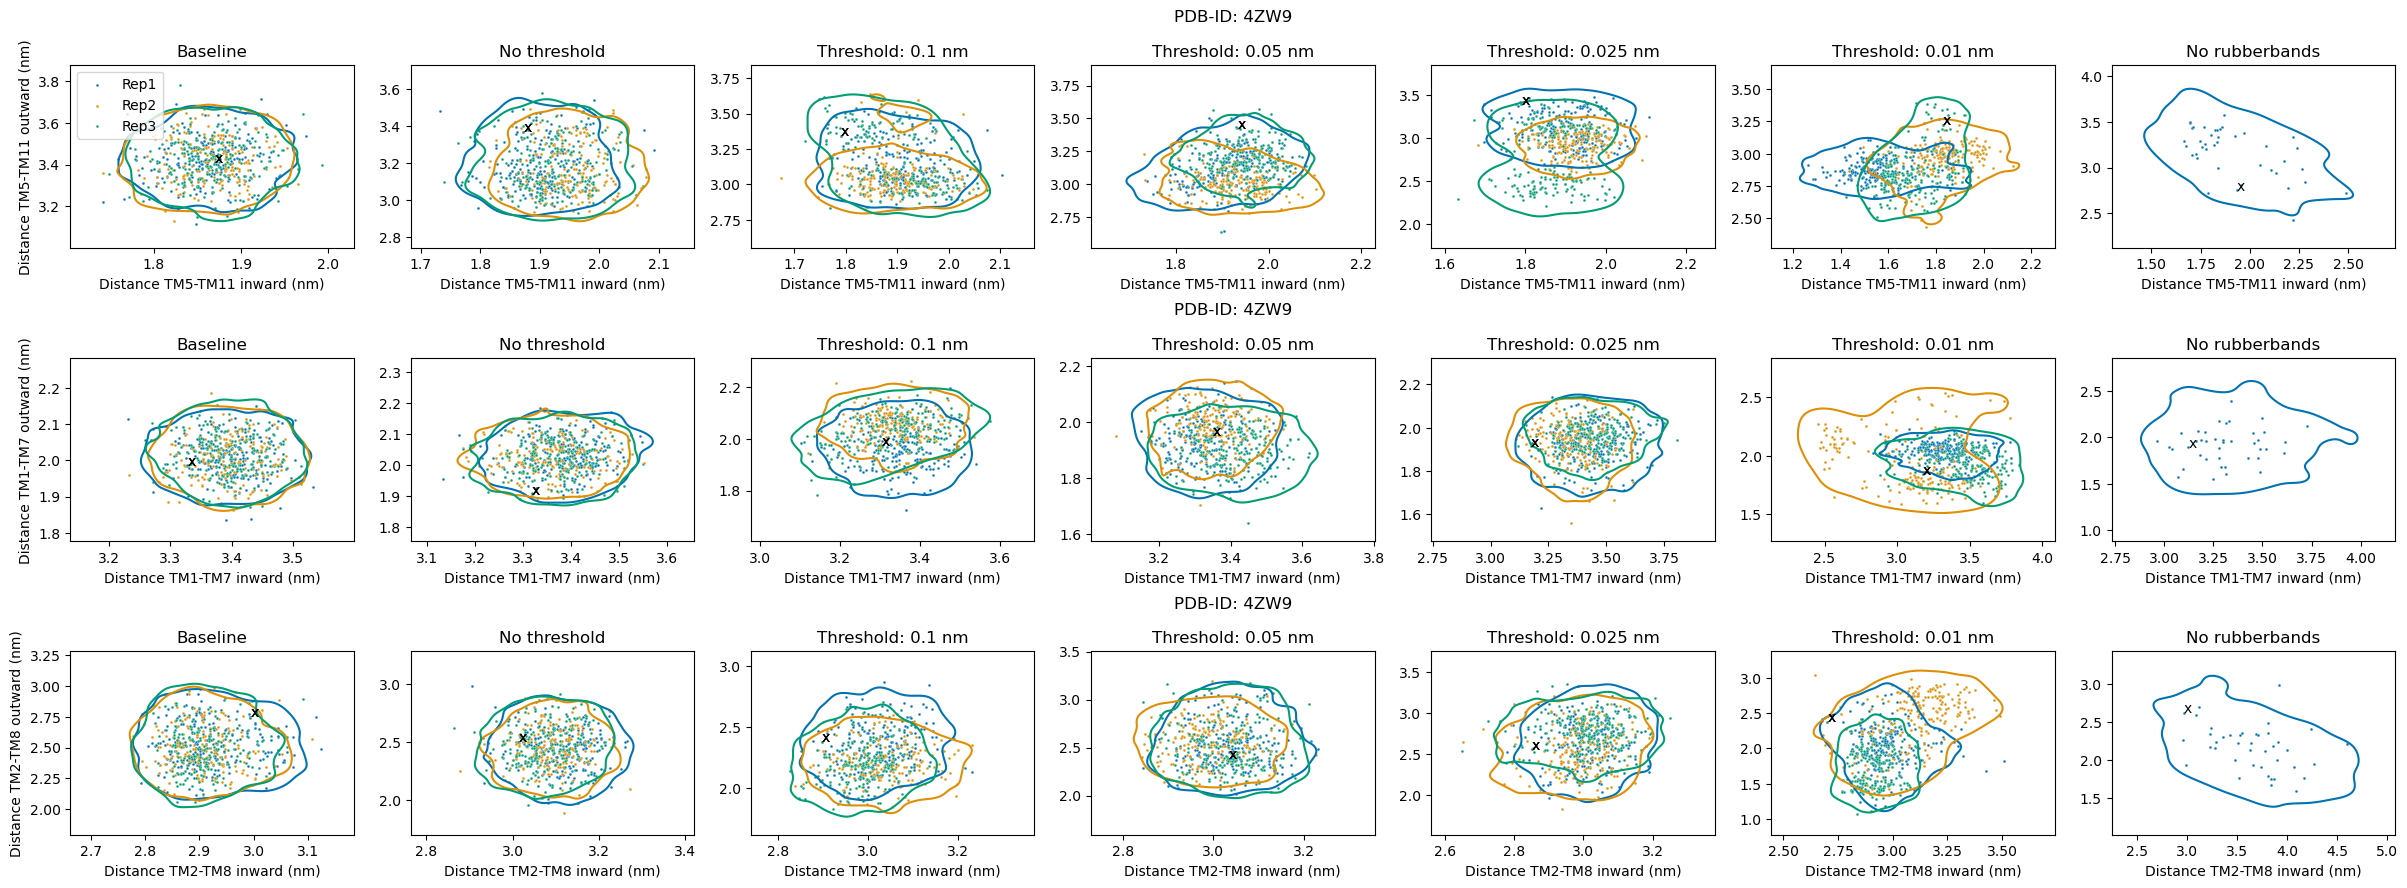

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_palette("colorblind")

ylim_offset = 0.75
threshold = "1.0_angstrom"

plt.rcParams["figure.figsize"] = (5,5)

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new


dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm no_rubber".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm", "No rubberbands"]
names = dict(zip(dir_names, label_names))
            

dataset = pd.DataFrame()
plt.rcParams["figure.figsize"] = (30, 10)
fig, axs = plt.subplots(3, 7)
fig.subplots_adjust(hspace=0.6)
fig.subplots_adjust(wspace=0.2)

for i, threshold in enumerate(dir_names):
    for j, item in enumerate([["TM5_TM11_in", "TM5_TM11_out"], ["TM1_TM7_in", "TM1_TM7_out"], ["TM2_TM8_in", "TM2_TM8_out"]]):
        for rep in range(3):
            path1 = "distances/4zw9/" + f"{threshold}_{item[0]}_rep{rep+1}.com.xvg"
            path2 = "distances/4zw9/" + f"{threshold}_{item[1]}_rep{rep+1}.com.xvg"
            if not os.path.isfile(path1):
                print(f"{path1} does not exist")
                continue
            
            if not os.path.isfile(path2):
                print(f"{path2} does not exist")
                continue

            # Load first file
            res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
            y1 = res[1][0:20*1000] # Grab the first 20k points
            
            # Load second file
            res = np.loadtxt(path2, comments=["@", "#"],unpack=True)
            y2 = res[1][0:20*1000] # Grab the first 20k points
        
            label = names[threshold]

            sns.kdeplot(x=subset(y1, 10), y=subset(y2, 10), levels=1, ax=axs[j][i])
            axs[j][i].text(x=y1[0], y=y2[0], s="x")
            sns.scatterplot(x=subset(y1, 50), y=subset(y2, 50), s=4, ax=axs[j][i])

            xlabel = item[0].split("_")
            axs[j][i].set_xlabel(f"Distance {xlabel[0]}-{xlabel[1]} {xlabel[2]}ward (nm)")

            ylabel = item[1].split("_")
            
            if i == 0 and j==0:
                axs[j][i].legend(labels=["Rep1","Rep2","Rep3"])

            if i == 3:
                axs[j][i].set_title(f"PDB-ID: 4ZW9\n\n{label}")
            else:
                axs[j][i].set_title(f"{label}")
                
            if i == 0:
                axs[j][i].set_ylabel(f"Distance {ylabel[0]}-{ylabel[1]} {ylabel[2]}ward (nm)")

            # """
            # TM5 <-> TM11
            # """
            # if j == 0:
            #     axs[j][i].set_xlim((1.0, 2.2))
            #     axs[j][i].set_ylim((1.8, 3.0))

            # """
            # TM1 <-> TM7
            # """
            # if j == 1:
            #     axs[j][i].set_xlim((2.4, 3.7))
            #     axs[j][i].set_ylim((1.55, 3.2))
            
            # """
            # TM2 <-> TM8
            # """
            # if j == 2:
            #     axs[j][i].set_xlim((2.6, 3.3))
            #     axs[j][i].set_ylim((1.6, 3.0))
            


## KDE plots 5EQI

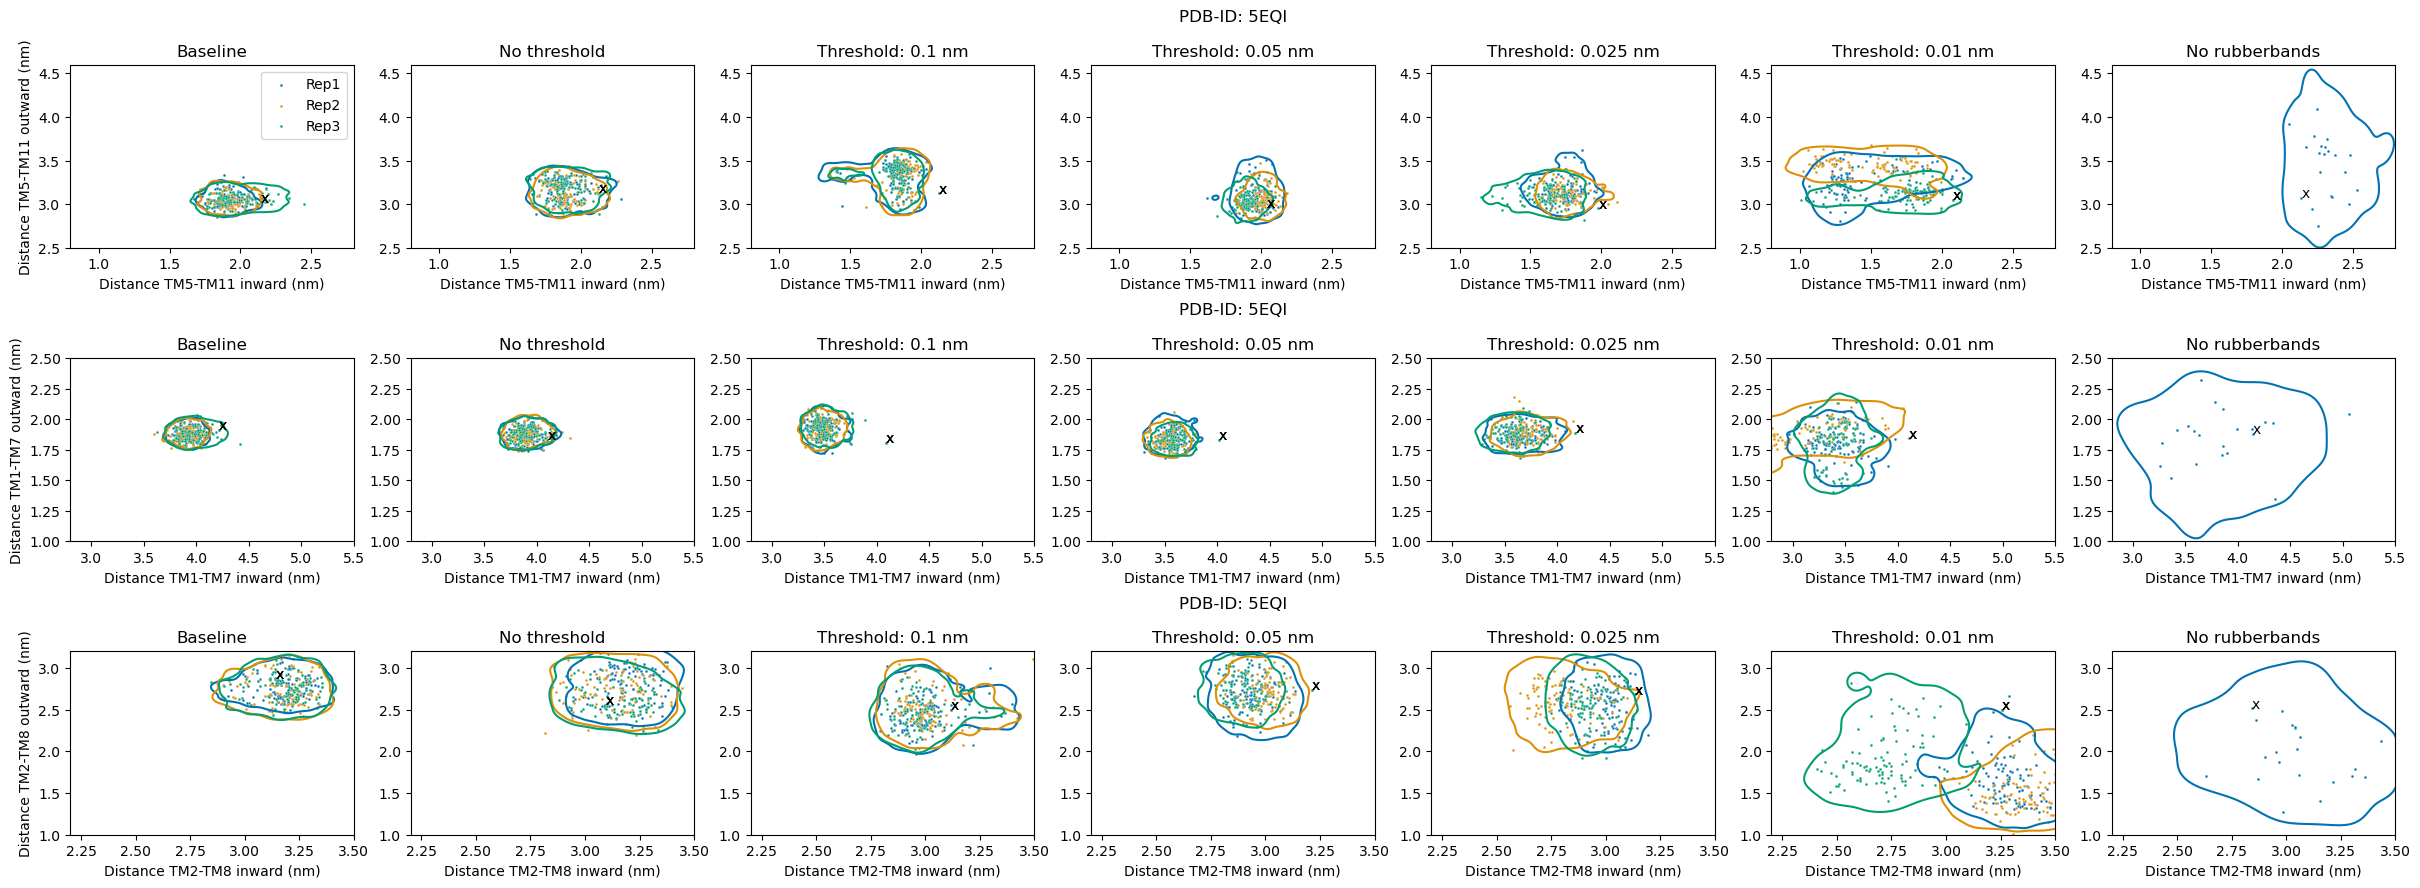

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ylim_offset = 0.75
threshold = "1.0_angstrom"

plt.rcParams["figure.figsize"] = (5,5)

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new


dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm no_rubber".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm", "No rubberbands"]
names = dict(zip(dir_names, label_names))
            

dataset = pd.DataFrame()
plt.rcParams["figure.figsize"] = (30, 10)
fig, axs = plt.subplots(3, 7)
fig.subplots_adjust(hspace=0.6)
fig.subplots_adjust(wspace=0.2)

for i, threshold in enumerate(dir_names):
    for j, item in enumerate([["TM5_TM11_in", "TM5_TM11_out"], ["TM1_TM7_in", "TM1_TM7_out"], ["TM2_TM8_in", "TM2_TM8_out"]]):
        for rep in range(3):
            path1 = "distances/5eqi/" + f"{threshold}_{item[0]}_rep{rep+1}.com.xvg"
            path2 = "distances/5eqi/" + f"{threshold}_{item[1]}_rep{rep+1}.com.xvg"
            if not os.path.isfile(path1):
                continue

            # Load first file
            res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
            y1 = res[1][0:20*1000] # Grab the first 20k points
            
            # Load second file
            res = np.loadtxt(path2, comments=["@", "#"],unpack=True)
            y2 = res[1][0:20*1000] # Grab the first 20k points
        
            label = names[threshold]

            sns.kdeplot(x=subset(y1, 10), y=subset(y2, 10), levels=1, ax=axs[j][i])
            axs[j][i].text(x=y1[0], y=y2[0], s="x")
            sns.scatterplot(x=subset(y1, 100), y=subset(y2, 100), s=4, ax=axs[j][i])

            xlabel = item[0].split("_")
            axs[j][i].set_xlabel(f"Distance {xlabel[0]}-{xlabel[1]} {xlabel[2]}ward (nm)")

            ylabel = item[1].split("_")
            
            if i == 0 and j == 0:
                axs[j][i].legend(labels=["Rep1","Rep2","Rep3"])

            if i == 3:
                axs[j][i].set_title(f"PDB-ID: 5EQI\n\n{label}")
            else:
                axs[j][i].set_title(f"{label}")

            if i == 0:
                axs[j][i].set_ylabel(f"Distance {ylabel[0]}-{ylabel[1]} {ylabel[2]}ward (nm)")
  
            
            """
            Set x/y limits per TM helix:
            TM5 <-> TM11
            """
            if j == 0:
                axs[j][i].set_xlim((0.8, 2.8))
                axs[j][i].set_ylim((2.5, 4.6))

            """
            TM1 <-> TM7
            """
            if j == 1:
                axs[j][i].set_xlim((2.8, 5.5))
                axs[j][i].set_ylim((1.0, 2.5))
            
            """
            TM2 <-> TM8
            """
            if j == 2:
                axs[j][i].set_xlim((2.2, 3.5))
                axs[j][i].set_ylim((1.0, 3.2))
            
            


## KDE plots 5EQI and 4ZW9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm no_rubber".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm", "Removed rubber bands"]
names = dict(zip(dir_names, label_names))

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

df = pd.DataFrame()
# Per protein:
for protein in ["5eqi", "4zw9"]:
    # Per threshold:
    for i, threshold in enumerate(dir_names):
        # Collect data from all replicates and distances:
        for j, item in enumerate([["TM5_TM11_in", "TM5_TM11_out"], ["TM1_TM7_in", "TM1_TM7_out"], ["TM2_TM8_in", "TM2_TM8_out"]]):
            for rep in range(4):
                path1 = f"distances/{protein}/" + f"{threshold}_{item[0]}_rep{rep+1}.com.xvg"
                path2 = f"distances/{protein}/" + f"{threshold}_{item[1]}_rep{rep+1}.com.xvg"
                if not os.path.isfile(path1):
                    continue

                res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
                y1 = subset(res[1], 10)
                res = np.loadtxt(path2, comments=["@", "#"],unpack=True)
                y2 = subset(res[1], 10)

                data = {
                        "protein": protein,
                        "item" : item[0] +  "_" + item[1], 
                        "threshold" : threshold,
                        "replicate" : "rep " + str(rep+1),
                        "x" : y1, 
                        "y" : y2, 
                        }
                df = pd.concat([df, pd.DataFrame(data)])

def fix_name(x):
    if x == "5eqi":
        return "GLUT1 "
    if x == "4zw9":
        return "GLUT3"
    return x

df['name'] = df['protein'].apply(fix_name)

<Figure size 640x480 with 0 Axes>

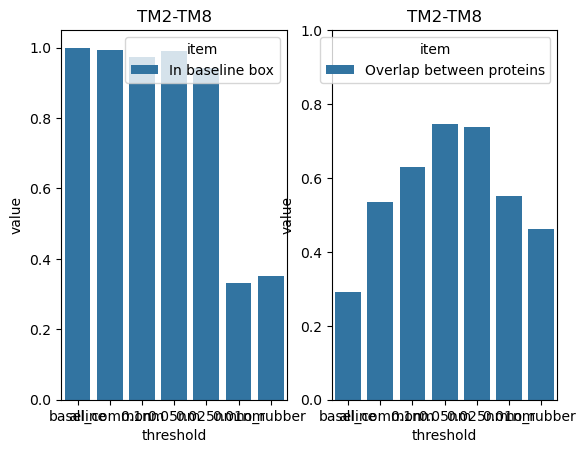

<Figure size 640x480 with 0 Axes>

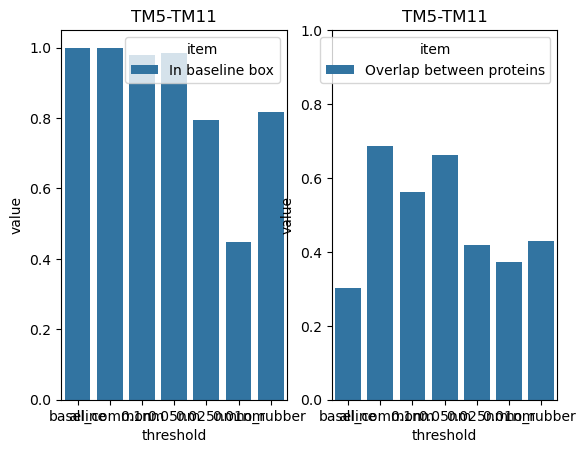

<Figure size 640x480 with 0 Axes>

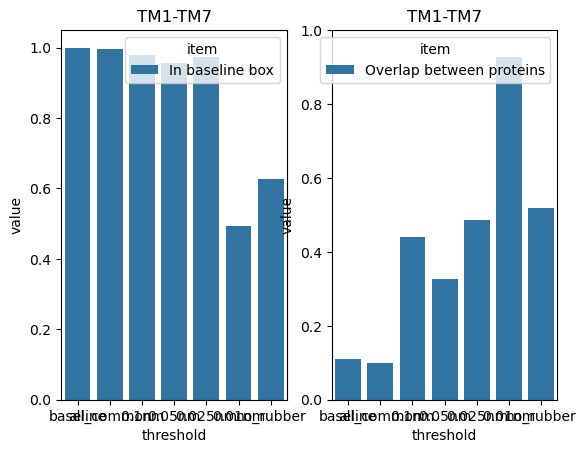

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np

def calc_overlap(list_a, list_b, num_bins=50):
    min_value = min(min(list_a), min(list_b))
    max_value = max(max(list_a), max(list_b))

    # Calculate bin width:
    bin_width = ((max_value + 0.01) - (min_value - 0.01)) / num_bins

    freq_a = np.zeros(num_bins)
    freq_b = np.zeros(num_bins)

    # Compute frequencies for list_a
    for value in list_a:
        bin_index = int((value - min_value) // bin_width)
        freq_a[bin_index] += 1

    # Compute frequencies for list_b
    for value in list_b:
        bin_index = int((value - min_value) // bin_width)
        freq_b[bin_index] += 1

    # Calculate overlap (intersection) based on shared frequencies
    overlap = np.sum(np.minimum(freq_a, freq_b))

    # print(f"Overlap between the lists: {overlap/(len(list_a))*100:.2f} ({overlap}/{len(list_a)}) data points")
    return overlap



def overlap(item):
    result = []
    for threshold in df['threshold'].unique():
        sum = 0
        total = 0

        in_box = 0
        total2 = 0

        a = df[(df['protein'] == "4zw9") & (df['item'] == item) & (df["threshold"] == "baseline")]
        b = df[(df['protein'] == "5eqi") & (df['item'] == item) & (df["threshold"] == "baseline")]
        
        # min_x, max_x, min_y, max_y
        baseline_box = (min(min(a['x']), min(b['x'])), 
                        max(max(a['x']), max(b['x'])), 
                        min(min(a['y']), min(b['y'])), 
                        max(max(a['y']), max(b['y'])))

        a = df[(df['protein'] == "4zw9") & (df['item'] == item) & (df["threshold"] == threshold)]
        b = df[(df['protein'] == "5eqi") & (df['item'] == item) & (df["threshold"] == threshold)]
        
        sum += calc_overlap(a['x'], b['x'])
        sum += calc_overlap(a['y'], b['y'])      
        total += len(a['y'])*2

        for x, y in zip(a['x'], a['y']):
            if (x <= baseline_box[1]) and (x >= baseline_box[0]) and (y >= baseline_box[2]) and (y <= baseline_box[3]):
                in_box += 1
            total2 += 1

        for x, y in zip(b['x'], b['y']):
            if (x <= baseline_box[1]) and (x >= baseline_box[0]) and (y >= baseline_box[2]) and (y <= baseline_box[3]):
                in_box += 1
            total2 += 1

        result.append({"threshold" : threshold,
                    "item"      : "Overlap between proteins",
                    "value"      : sum/total})
        result.append({"threshold" : threshold,
                    "item"      : "In baseline box",
                    "value"      : in_box/total2})
    return result



fig, axs = plt.subplots(1,2)
result = pd.DataFrame(overlap("TM2_TM8_in_TM2_TM8_out"))
sns.barplot(data=result[result['item'] == "In baseline box"], x="threshold", y="value", hue="item", ax=axs[0])
sns.barplot(data=result[result['item'] == "Overlap between proteins"], x="threshold", y="value", hue="item", ax=axs[1])
axs[0].set_title("TM2-TM8")
axs[1].set_title("TM2-TM8")
axs[1].set_ylim((0,1))
plt.figure()

fig, axs = plt.subplots(1,2)
result = pd.DataFrame(overlap("TM5_TM11_in_TM5_TM11_out"))
sns.barplot(data=result[result['item'] == "In baseline box"], x="threshold", y="value", hue="item", ax=axs[0])
sns.barplot(data=result[result['item'] == "Overlap between proteins"], x="threshold", y="value", hue="item", ax=axs[1])
axs[0].set_title("TM5-TM11")
axs[1].set_title("TM5-TM11")
axs[1].set_ylim((0,1))
plt.figure()

fig, axs = plt.subplots(1,2)
result = pd.DataFrame(overlap("TM1_TM7_in_TM1_TM7_out"))
sns.barplot(data=result[result['item'] == "In baseline box"], x="threshold", y="value", hue="item", ax=axs[0])
sns.barplot(data=result[result['item'] == "Overlap between proteins"], x="threshold", y="value", hue="item", ax=axs[1])
axs[0].set_title("TM1-TM7")
axs[1].set_title("TM1-TM7")
axs[1].set_ylim((0,1))
plt.figure()

# result = overlap("TM5_TM11_in_TM5_TM11_out")
# ax = sns.barplot(data=pd.DataFrame(result), x="threshold", y="value", hue="item")
# ax.set_title("TM5-TM11")
# plt.figure()

# result = overlap("TM1_TM7_in_TM1_TM7_out")
# ax = sns.barplot(data=pd.DataFrame(result), x="threshold", y="value", hue="item")
# ax.set_title("TM1-TM7")
# plt.figure()

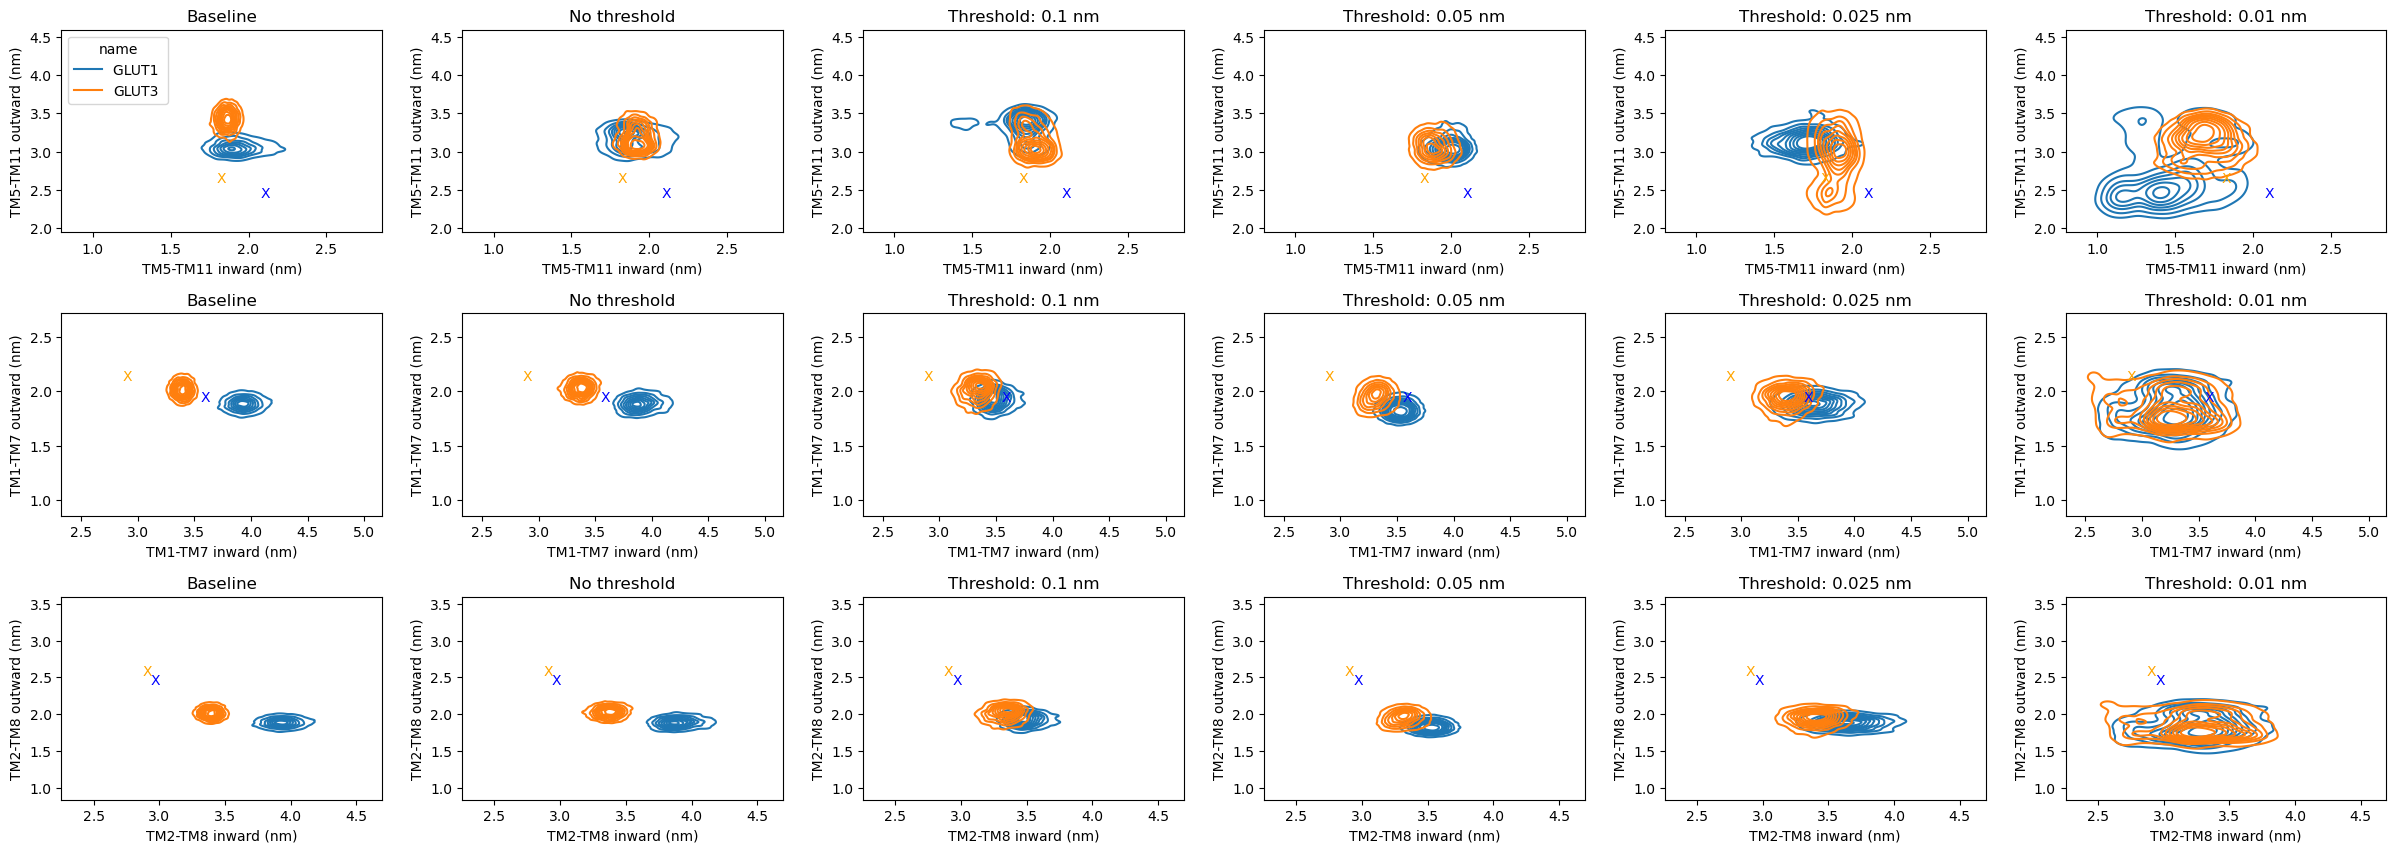

In [26]:
init_distances = pd.read_csv("initial_distances.tsv", sep="\t")

plt.rcParams["figure.figsize"] = (30, 10)
fig, axs = plt.subplots(3, 6)

fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.25)

dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm".split(" ")
label_names = ["Baseline", "No threshold", "Threshold: 0.1 nm", "Threshold: 0.05 nm", "Threshold: 0.025 nm" , "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))


for i, threshold in enumerate(dir_names):
    label = names[threshold]


    first_helix = df[(df['threshold'] == threshold) & (df['item'] == "TM5_TM11_in_TM5_TM11_out")]
    min_max = df[(df['item'] == "TM5_TM11_in_TM5_TM11_out")]
    sns.kdeplot(data=first_helix, x="x", y="y", hue="name", ax=axs[0][i], fill=False, legend=(i==0))       
    axs[0][i].set_title(label)
    axs[0][i].set_xlabel("TM5-TM11 inward (nm)")
    axs[0][i].set_ylabel("TM5-TM11 outward (nm)")    
    axs[0][i].set_xlim((min(min_max['x'])-0.1, max(min_max['x'])+0.1))
    axs[0][i].set_ylim((min(min_max['y'])-0.1, max(min_max['y'])+0.1))

    helix = "TM5_TM11"
    x_a = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_in") & (init_distances['protein'] == "5eqi")]['distance'].iloc[0]
    y_a = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_out") & (init_distances['protein'] == "5eqi")]['distance'].iloc[0]
    x_b = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_in") & (init_distances['protein'] == "4zw9")]['distance'].iloc[0]
    y_b = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_out") & (init_distances['protein'] == "4zw9")]['distance'].iloc[0]
    axs[0][i].text(x=x_a, y=y_a, s="X", color="blue")
    axs[0][i].text(x=x_b, y=y_b, s="X", color="orange")

    second_helix = df[(df['threshold'] == threshold) & (df['item'] == "TM1_TM7_in_TM1_TM7_out")]
    min_max = df[(df['item'] == "TM1_TM7_in_TM1_TM7_out")]

    sns.kdeplot(data=second_helix, x="x", y="y", hue="name",ax=axs[1][i], fill=False, legend=False)
    axs[1][i].set_title(label)
    axs[1][i].set_xlabel("TM1-TM7 inward (nm)")
    axs[1][i].set_ylabel("TM1-TM7 outward (nm)")
    axs[1][i].set_xlim((min(min_max['x'])-0.1, max(min_max['x'])+0.1))
    axs[1][i].set_ylim((min(min_max['y'])-0.1, max(min_max['y'])+0.1))

    helix = "TM1_TM7"
    x_a = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_in") & (init_distances['protein'] == "5eqi")]['distance'].iloc[0]
    y_a = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_out") & (init_distances['protein'] == "5eqi")]['distance'].iloc[0]
    x_b = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_in") & (init_distances['protein'] == "4zw9")]['distance'].iloc[0]
    y_b = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_out") & (init_distances['protein'] == "4zw9")]['distance'].iloc[0]
    axs[1][i].text(x=x_a, y=y_a, s="X", color="blue")
    axs[1][i].text(x=x_b, y=y_b, s="X", color="orange")


    third_helix = df[(df['threshold'] == threshold) & (df['item'] == "TM2_TM8_in_TM2_TM8_out")]
    min_max = df[(df['item'] == "TM2_TM8_in_TM2_TM8_out")]
    sns.kdeplot(data=second_helix, x="x", y="y", hue="name",ax=axs[2][i], fill=False, legend=False)    
    axs[2][i].set_title(label)
    axs[2][i].set_xlabel("TM2-TM8 inward (nm)")
    axs[2][i].set_ylabel("TM2-TM8 outward (nm)")
    axs[2][i].set_xlim((min(min_max['x'])-0.1, max(min_max['x'])+0.1))
    axs[2][i].set_ylim((min(min_max['y'])-0.1, max(min_max['y'])+0.1))
    
    helix = "TM2_TM8"
    x_a = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_in") & (init_distances['protein'] == "5eqi")]['distance'].iloc[0]
    y_a = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_out") & (init_distances['protein'] == "5eqi")]['distance'].iloc[0]
    x_b = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_in") & (init_distances['protein'] == "4zw9")]['distance'].iloc[0]
    y_b = init_distances[(init_distances['description'] == f"cg_crystal_{helix}_out") & (init_distances['protein'] == "4zw9")]['distance'].iloc[0]
    axs[2][i].text(x=x_a, y=y_a, s="X", color="blue")
    axs[2][i].text(x=x_b, y=y_b, s="X", color="orange")

    if i == 0:
        sns.move_legend(axs[0][i], "upper left")



# Only plot replicate 4

In [8]:
df_only4 = df[df['replicate'] == "rep 4"]
df_only4

protein                      item threshold replicate      x      y  \
0        5eqi  TM5_TM11_in_TM5_TM11_out    0.05nm     rep 4  2.039  2.962   
1        5eqi  TM5_TM11_in_TM5_TM11_out    0.05nm     rep 4  1.762  3.071   
2        5eqi  TM5_TM11_in_TM5_TM11_out    0.05nm     rep 4  2.038  2.957   
3        5eqi  TM5_TM11_in_TM5_TM11_out    0.05nm     rep 4  1.876  2.970   
4        5eqi  TM5_TM11_in_TM5_TM11_out    0.05nm     rep 4  1.760  3.019   
...       ...                       ...       ...       ...    ...    ...   
11958    4zw9    TM2_TM8_in_TM2_TM8_out    0.01nm     rep 4  3.063  4.520   
11959    4zw9    TM2_TM8_in_TM2_TM8_out    0.01nm     rep 4  2.974  4.482   
11960    4zw9    TM2_TM8_in_TM2_TM8_out    0.01nm     rep 4  3.212  4.525   
11961    4zw9    TM2_TM8_in_TM2_TM8_out    0.01nm     rep 4  3.107  4.624   
11962    4zw9    TM2_TM8_in_TM2_TM8_out    0.01nm     rep 4  3.128  4.699   

         name  
0      GLUT1   
1      GLUT1   
2      GLUT1   
3      GLUT1   
4      GLUT1   
...       ...  
11958   GLUT3  
11959   GLUT3  
11960   GLUT3  
11961   GLUT3  
11962   GLUT3  

[155304 rows x 7 columns]

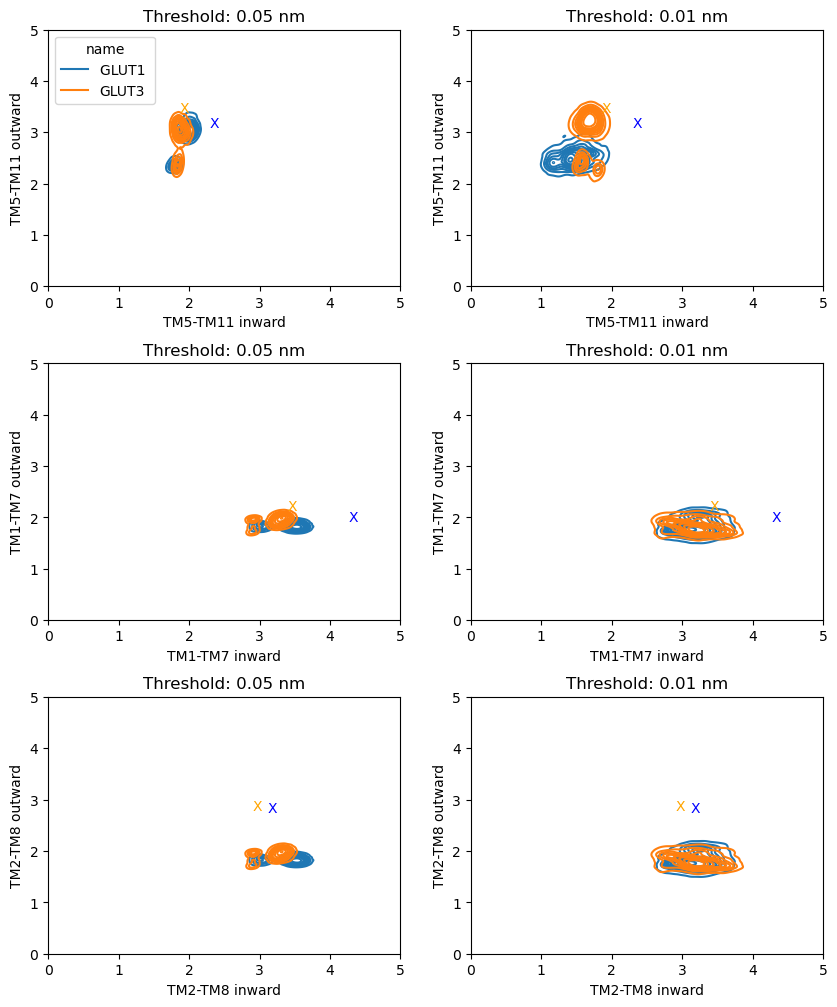

In [29]:
plt.rcParams["figure.figsize"] = (10, 12)
fig, axs = plt.subplots(3, 2)

fig.subplots_adjust(hspace=0.3)
# fig.subplots_adjust(wspace=0.25)

dir_names = "0.05nm 0.01nm".split(" ")
label_names = ["Threshold: 0.05 nm", "Threshold: 0.01 nm"]
names = dict(zip(dir_names, label_names))



for i, threshold in enumerate(dir_names):
    label = names[threshold]


    first_helix = df[(df['threshold'] == threshold) & (df['item'] == "TM5_TM11_in_TM5_TM11_out")]
    sns.kdeplot(data=first_helix, x="x", y="y", hue="name", ax=axs[0][i], fill=False, legend=(i==0))       
    # sns.scatterplot(data=first_helix, x="x", y="y", hue="name", ax=axs[0][i], legend=(i==0))       
    axs[0][i].set_title(label)
    axs[0][i].text(x=2.288, y=3.103, s="X", color="blue")
    axs[0][i].text(x=1.859, y=3.380, s="X", color="orange")
    axs[0][i].set_xlabel("TM5-TM11 inward")
    axs[0][i].set_ylabel("TM5-TM11 outward")


    second_helix = df[(df['threshold'] == threshold) & (df['item'] == "TM1_TM7_in_TM1_TM7_out")]
    sns.kdeplot(data=second_helix, x="x", y="y", hue="name",ax=axs[1][i], fill=False, legend=False)
    # sns.scatterplot(data=second_helix, x="x", y="y", hue="name",ax=axs[1][i], legend=False)
    axs[1][i].set_title(label)
    axs[1][i].text(x=4.268, y=1.920, s="X", color="blue")
    axs[1][i].text(x=3.394, y=2.142, s="X", color="orange")
    axs[1][i].set_xlabel("TM1-TM7 inward")
    axs[1][i].set_ylabel("TM1-TM7 outward")

    third_helix = df[(df['threshold'] == threshold) & (df['item'] == "TM2_TM8_in_TM2_TM8_out")]
    sns.kdeplot(data=second_helix, x="x", y="y", hue="name", ax=axs[2][i], fill=False, legend=False)
    # sns.scatterplot(data=second_helix, x="x", y="y", hue="name", ax=axs[2][i], legend=False)
    axs[2][i].set_title(label)
    axs[2][i].text(x=3.113, y=2.748, s="X", color="blue")
    axs[2][i].text(x=2.900, y=2.788, s="X", color="orange")
    axs[2][i].set_xlabel("TM2-TM8 inward")
    axs[2][i].set_ylabel("TM2-TM8 outward")

    for c in range(3):
        axs[c][i].set_xlim((0, 5))
        axs[c][i].set_ylim((0, 5))
        
 
    if i == 0:
        sns.move_legend(axs[0][i], "upper left")





# Length of helices

In [10]:
dir_names = "baseline all_common 0.1nm 0.05nm 0.025nm 0.01nm".split(" ")
label_names = ["Baseline", "No threshold", "0.1 nm", "0.05 nm", "0.025 nm" , "0.01 nm", "no_rubber"]
names = dict(zip(dir_names, label_names))

import pandas as pd
import numpy as np
import os
df = pd.DataFrame()
# Per protein:
for protein in ["5eqi", "4zw9"]:
    # Per threshold:
    for i, threshold in enumerate(dir_names):
        # Collect data from all replicates and distances:
        for j, item in enumerate(["TM5_TM11_in", "TM5_TM11_out", "TM1_TM7_in", "TM1_TM7_out","TM2_TM8_in", "TM2_TM8_out",
                                  "TM11_TM11_in_out", "TM1_TM1_in_out", "TM5_TM5_in_out", "TM7_TM7_in_out", "TM2_TM2_in_out", "TM8_TM8_in_out"]):
            for rep in range(3):
                path1 = f"distances/{protein}/" + f"{threshold}_{item}_rep{rep+1}.com.xvg"
                if not os.path.isfile(path1):
                    print(f"Not found: {path1}")
                    continue

                res = np.loadtxt(path1, comments=["@", "#"],unpack=True)
                y1 = res[1]

                data = {
                        "protein": protein,
                        "item": item ,
                        "threshold" : names[threshold],
                        "replicate" : "rep " + str(rep+1),
                        "x" : y1, 
                        }
                df = pd.concat([df, pd.DataFrame(data)])
df

protein            item threshold replicate      x
0        5eqi     TM5_TM11_in  Baseline     rep 1  1.965
1        5eqi     TM5_TM11_in  Baseline     rep 1  2.036
2        5eqi     TM5_TM11_in  Baseline     rep 1  1.760
3        5eqi     TM5_TM11_in  Baseline     rep 1  1.780
4        5eqi     TM5_TM11_in  Baseline     rep 1  1.814
...       ...             ...       ...       ...    ...
9996     4zw9  TM8_TM8_in_out   0.01 nm     rep 3  2.072
9997     4zw9  TM8_TM8_in_out   0.01 nm     rep 3  2.190
9998     4zw9  TM8_TM8_in_out   0.01 nm     rep 3  2.146
9999     4zw9  TM8_TM8_in_out   0.01 nm     rep 3  2.161
10000    4zw9  TM8_TM8_in_out   0.01 nm     rep 3  2.032

[4320432 rows x 5 columns]

In [11]:
df['threshold'].unique()

array(['Baseline', 'No threshold', '0.1 nm', '0.05 nm', '0.025 nm',
       '0.01 nm'], dtype=object)

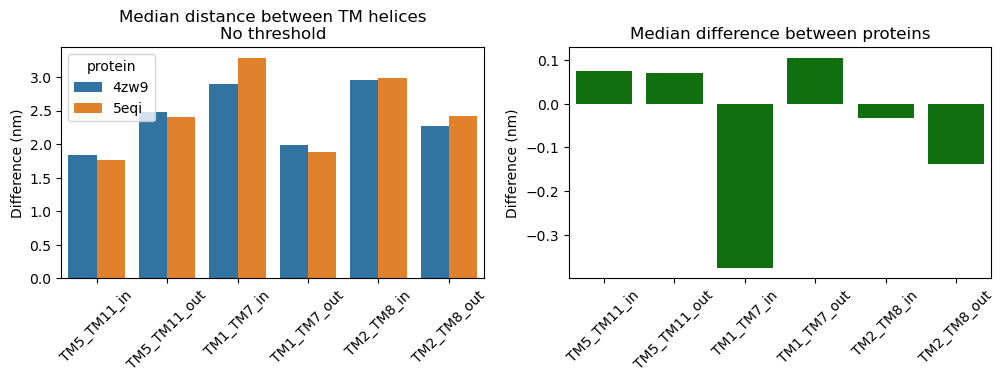

<Figure size 1200x300 with 0 Axes>

In [12]:
import seaborn as sns
threshold = "No threshold"

df_difference  = []
df_to_test = df[df['threshold'] == threshold]
for item in ["TM5_TM11_in", "TM5_TM11_out", "TM1_TM7_in", "TM1_TM7_out","TM2_TM8_in", "TM2_TM8_out"]:
    gb = df_to_test[df_to_test['item'] == item].groupby("protein").mean("x")
    a = float(gb.loc['4zw9'].iloc[0])
    b = float(gb.loc['5eqi'].iloc[0])
    # print(f"{item}\t{a:.2f}\t{b:.2f}\t{a-b:.2f}")

    df_difference.append({"item" : item,
                          "protein": "4zw9",
                          "length" : a})
    df_difference.append({"item" : item,
                          "protein": "5eqi",
                          "length" : b})
    df_difference.append({"item" : item,
                          "protein": "diff",
                          "length" : a-b})
    
df_difference = pd.DataFrame(df_difference)


plt.rcParams["figure.figsize"] = (12, 3)
fig, axs = plt.subplots(1,2)

fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.2)

ax=sns.barplot(data=df_difference[df_difference['protein'] != "diff"], x="item", y="length", hue="protein", ax=axs[0])
ax.set_title(f"Median distance between TM helices\n{threshold}")
ax.set_xlabel(None)
ax.set_ylabel("Difference (nm)")
ax.tick_params(axis='x', labelrotation=45)
plt.figure()

ax = sns.barplot(data=df_difference[df_difference['protein'] == "diff"], x="item", y="length", legend=False, ax=axs[1], color='green')
ax.set_title("Median difference between proteins")
ax.set_xlabel(None)
ax.set_ylabel("Difference (nm)")
ax.tick_params(axis='x', labelrotation=45)


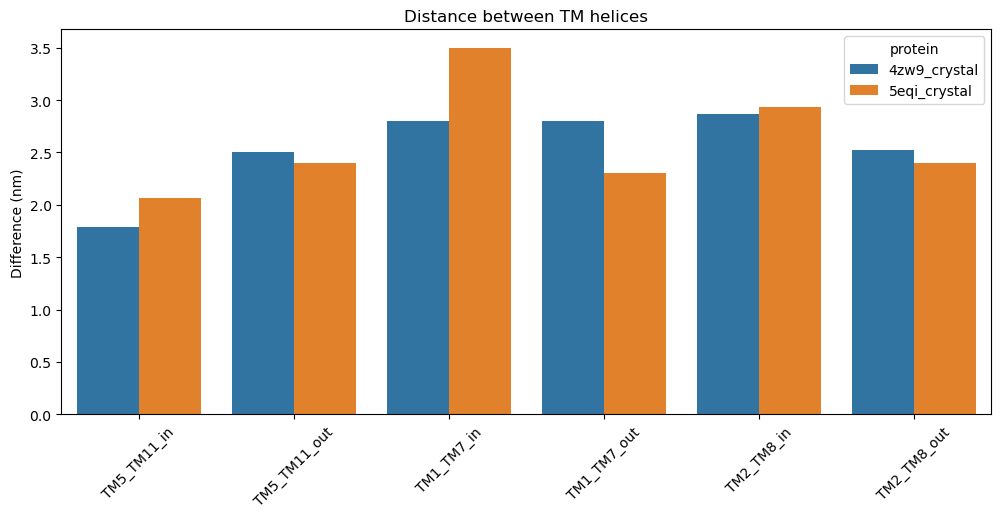

In [13]:
plt.rcParams["figure.figsize"] = (12, 5)
crystal_df = pd.DataFrame([
{"item" : "TM5_TM11_in", "length" : 1.79, "protein" : "4zw9_crystal"},
{"item" : "TM5_TM11_in", "length" : 2.07, "protein" : "5eqi_crystal"},
{"item" : "TM5_TM11_out","length" : 2.50, "protein" : "4zw9_crystal"},
{"item" : "TM5_TM11_out","length" : 2.40, "protein" : "5eqi_crystal"},
{"item" : "TM1_TM7_in",  "length" : 2.80, "protein" : "4zw9_crystal"},
{"item" : "TM1_TM7_in",  "length" : 3.50, "protein" : "5eqi_crystal"},
{"item" : "TM1_TM7_out", "length" : 2.80, "protein" : "4zw9_crystal"},
{"item" : "TM1_TM7_out", "length" : 2.30, "protein" : "5eqi_crystal"},
{"item" : "TM2_TM8_in",  "length" : 2.87, "protein" : "4zw9_crystal"},
{"item" : "TM2_TM8_in",  "length" : 2.93, "protein" : "5eqi_crystal"},
{"item" : "TM2_TM8_out", "length" : 2.52, "protein" : "4zw9_crystal"},
{"item" : "TM2_TM8_out", "length" : 2.40, "protein" : "5eqi_crystal"},
])

ax=sns.barplot(data=crystal_df, x="item", y="length", hue="protein")
ax.set_title("Distance between TM helices")
ax.set_xlabel(None)
ax.set_ylabel("Difference (nm)")
ax.tick_params(axis='x', labelrotation=45)

In [14]:
diff_df = pd.DataFrame()

i = 0
tms_files = ["TM11_TM11_in_out", 
             "TM1_TM1_in_out", 
             "TM5_TM5_in_out", 
             "TM7_TM7_in_out", 
             "TM2_TM2_in_out", 
             "TM8_TM8_in_out"]
diff_df = []
for tm in tms_files:
    df_selection = df[df['item'] == tm]

    # Mean for baseline:
    # Groupby to save some typing:
    gb = df_selection[df_selection['threshold'] == "Baseline"].groupby("protein").mean("x")
    mean_4zw9, mean_5eqi = gb['x']['4zw9'], gb['x']['5eqi']

    for threshold in df_selection['threshold'].unique():
        df_selection_t = df_selection[df_selection['threshold'] == threshold]
        # Groupby to save some typing:
        gb = df_selection_t.groupby("protein").mean("x").agg(list)
        # print(f"4zw9:{median_4zw9 - gb['x']['4zw9']:.2f} 5eqi:{median_5eqi-gb['x']['5eqi']:.2f}nm")

        res = {"threshold" : threshold, 
               "tm" : tm,
               "protein" : "4zw9",
               "diff" : (mean_4zw9 - gb['x']['4zw9']),
               }
        diff_df.append(res)
        res = {"threshold" : threshold, 
               "tm" : tm,
               "protein" : "5eqi",
               "diff" : (mean_5eqi - gb['x']['5eqi']),
               }
        diff_df.append(res)

diff_df = pd.DataFrame(diff_df)

Text(0.5, 1.0, 'Difference in distance between 12 TM helices compared to baseline')

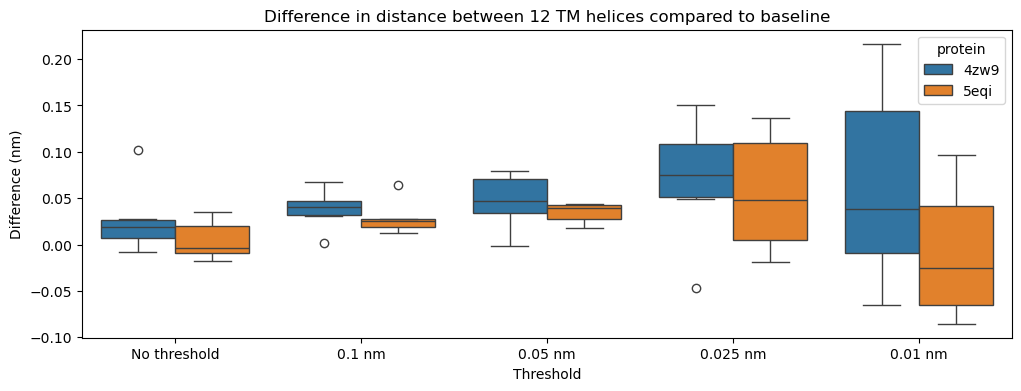

In [15]:
plt.rcParams["figure.figsize"] = (12, 4)

ax = sns.boxplot(data=diff_df[diff_df['threshold'] != "Baseline"], x="threshold", hue="protein", y="diff")
ax.set_ylabel("Difference (nm)")
ax.set_xlabel("Threshold")
ax.set_title("Difference in distance between 12 TM helices compared to baseline")

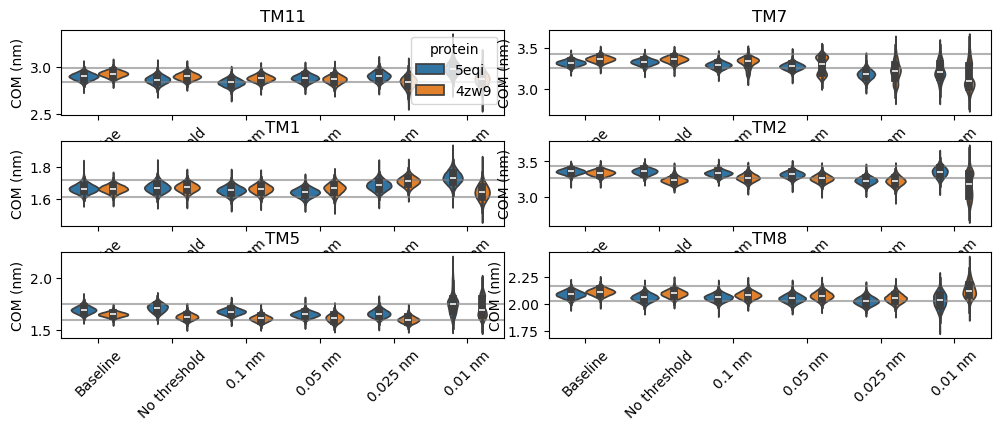

In [16]:
import matplotlib.pyplot as plt

tms_files = ["TM11_TM11_in_out", "TM1_TM1_in_out", "TM5_TM5_in_out", "TM7_TM7_in_out", "TM2_TM2_in_out", "TM8_TM8_in_out"]
title_conv = dict(zip(tms_files, ["TM11", "TM1", "TM5", "TM7", "TM2", "TM8"]))

fig, axs = plt.subplots(3, 2)
plt.rcParams["figure.figsize"] = (15, 15)
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.1)

pos = []
for j in range(2):
    for i in range(3):
        pos.append((i, j))

for j, item in enumerate(tms_files):
    a, b = pos[j][0], pos[j][1]
    
    # Horizontal lines:
    selection = df[(df['threshold'] == 'Baseline') & (df['item'] == item)]
    line1 = np.mean(selection['x']) + np.std(selection['x']) * 2
    line2 = np.mean(selection['x']) - np.std(selection['x']) * 2
    line3 = np.median(selection['x'])
    axs[a][b].axhline(y=line1, c='grey', alpha=0.6)
    axs[a][b].axhline(y=line2, c='grey', alpha=0.6)
    # axs[a][b].axhline(y=line3, c='red', alpha=0.6)

    # Violin plot:
    df2 = df[(df['item'] == item)]
    sns.violinplot(data=df2, x='threshold', y='x', hue='protein', ax=axs[a][b], legend=(j==0))

    # labels:
    axs[a][b].set_title(title_conv[item])
    if b == 2:
        axs[a][b].set_xlabel("Threshold")
    else:
        axs[a][b].set_xlabel(None)
    axs[a][b].set_ylabel("COM (nm)")
    axs[a][b].tick_params(axis='x', labelrotation=45)
